# Avocado Analysis

##  Data
Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here’s how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 

Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation 
* AveragePrice - the average price of a single avocado 
* type - conventional or organic 
* year - the year 
* region - the city or region of the observation 
* Total Volume - Total number of avocados sold 
* 4046 - Total number of avocados with PLU 4046 sold 
* 4225 - Total number of avocados with PLU 4225 sold 
* 4770 - Total number of avocados with PLU 4770 sold

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
#warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gloria08/avocado_project/master/avocado.csv")

## Data Checking and Cleaning
### There are 14 variables and 18249 rows in data.

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [7]:
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13099,22,2016-07-24,1.21,111080.96,14249.95,27897.64,20.74,68912.63,61674.03,7238.60,0.00,organic,2016,LosAngeles
1300,0,2015-12-27,1.05,2065131.33,435246.31,1022861.71,103811.97,503211.34,464119.16,35717.26,3374.92,conventional,2015,Midsouth
17074,1,2017-12-24,1.48,12762.43,118.57,3514.42,79.12,9050.32,8708.91,341.41,0.00,organic,2017,SouthCarolina


### I continued checking if any null values, any duplicated rows and also checked if any extrem values to be aware of. All good!

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
 df[df.duplicated()]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [12]:
columns_to_drop=['year','Unnamed: 0']
df.drop(columns_to_drop, axis=1,inplace=True)

### After checked the class of each columns, I dropped year column as it is duplicate. We can get it from Date column. Then I decided to convert the Date column from string to date. I also created a new column called month from Date columns in case for monthly analysis. 

In [13]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)


### Then I sorted the data by Date by ascending order.

In [14]:
df = df.sort_values(by="Date",
                           ignore_index=True)

In [15]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,Southeast,2015,1
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,Chicago,2015,1
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,HarrisburgScranton,2015,1


### Reoder columns for easy checking.

In [16]:
order = [0,-2,-1,11,10, 1,2,3,4,5,6,7,8,9] # setting column's order
df = df[[df.columns[i] for i in order]]
df.head(3)

,Date,Year,Month,region,type,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015-01-04,2015,1,Southeast,organic,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0
1,2015-01-04,2015,1,Chicago,organic,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0
2,2015-01-04,2015,1,HarrisburgScranton,organic,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   Year          18249 non-null  int64         
 2   Month         18249 non-null  int64         
 3   region        18249 non-null  object        
 4   type          18249 non-null  object        
 5   AveragePrice  18249 non-null  float64       
 6   Total Volume  18249 non-null  float64       
 7   4046          18249 non-null  float64       
 8   4225          18249 non-null  float64       
 9   4770          18249 non-null  float64       
 10  Total Bags    18249 non-null  float64       
 11  Small Bags    18249 non-null  float64       
 12  Large Bags    18249 non-null  float64       
 13  XLarge Bags   18249 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [18]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [19]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [20]:
pd.crosstab(df['Year'], df['type'])

type,conventional,organic
Year,,
2015,2808,2807
2016,2808,2808
2017,2862,2860
2018,648,648


In [21]:
pd.crosstab(df['Year'], df['Month'], dropna=False)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,432,432,540,432,540,432,432,540,432,432,540,431
2016,540,432,432,432,540,432,540,432,432,540,432,432
2017,540,432,432,540,432,430,540,432,432,540,432,540
2018,432,432,432,0,0,0,0,0,0,0,0,0


In [22]:
pd.crosstab([df['Year'],df['Month']],df['type'])

type        conventional  organic
Year Month                       
2015 1               216      216
     2               216      216
     3               270      270
     4               216      216
     5               270      270
     6               216      216
     7               216      216
     8               270      270
     9               216      216
     10              216      216
     11              270      270
     12              216      215
2016 1               270      270
     2               216      216
     3               216      216
     4               216      216
     5               270      270
     6               216      216
     7               270      270
     8               216      216
     9               216      216
     10              270      270
     11              216      216
     12              216      216
2017 1               270      270
     2               216      216
     3               216      216
     4               270      270
     5               216      216
     6               216      214
     7               270      270
     8               216      216
     9               216      216
     10              270      270
     11              216      216
     12              270      270
2018 1               216      216
     2               216      216
     3               216      216

### Region column is quite messy. It contains total USA, regions and cities.

In [23]:
pd.crosstab(df['region'],df['Year'])

Year,2015,2016,2017,2018
region,,,,
Albany,104,104,106,24
Atlanta,104,104,106,24
BaltimoreWashington,104,104,106,24
Boise,104,104,106,24
Boston,104,104,106,24
BuffaloRochester,104,104,106,24
California,104,104,106,24
Charlotte,104,104,106,24
Chicago,104,104,106,24


In [24]:
df.region.unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

### We only choose Total US as analysis scope.

In [25]:
USdata=df[df['region']=='TotalUS']

In [26]:
pd.crosstab([USdata['Year'],USdata['Month']],
            USdata['type'])

type        conventional  organic
Year Month                       
2015 1                 4        4
     2                 4        4
     3                 5        5
     4                 4        4
     5                 5        5
     6                 4        4
     7                 4        4
     8                 5        5
     9                 4        4
     10                4        4
     11                5        5
     12                4        4
2016 1                 5        5
     2                 4        4
     3                 4        4
     4                 4        4
     5                 5        5
     6                 4        4
     7                 5        5
     8                 4        4
     9                 4        4
     10                5        5
     11                4        4
     12                4        4
2017 1                 5        5
     2                 4        4
     3                 4        4
     4                 5        5
     5                 4        4
     6                 4        4
     7                 5        5
     8                 4        4
     9                 4        4
     10                5        5
     11                4        4
     12                5        5
2018 1                 4        4
     2                 4        4
     3                 4        4

In [27]:
df_US = USdata.sort_values(by="Date",
                           ignore_index=True)

In [28]:
df_US.sample(3)

,Date,Year,Month,region,type,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
76,2015-09-27,2015,9,TotalUS,organic,1.75,501814.87,114590.38,238175.26,4546.66,144502.57,81095.01,63407.56,0.00
111,2016-01-24,2016,1,TotalUS,conventional,0.95,32787079.21,7020459.00,14054367.50,1440380.36,10271872.35,7438489.60,2668368.01,165014.74
328,2018-02-25,2018,2,TotalUS,organic,1.57,1459852.55,122912.97,340374.83,1063.32,994471.50,765056.82,229158.56,256.12


## Analysis
### Organic avocados are generally more expensive than conventional type.

In [29]:
date_range=df_US['Date'].min().strftime('%Y-%m-%d') +' ~ '+df_US['Date'].max().strftime('%Y-%m-%d')

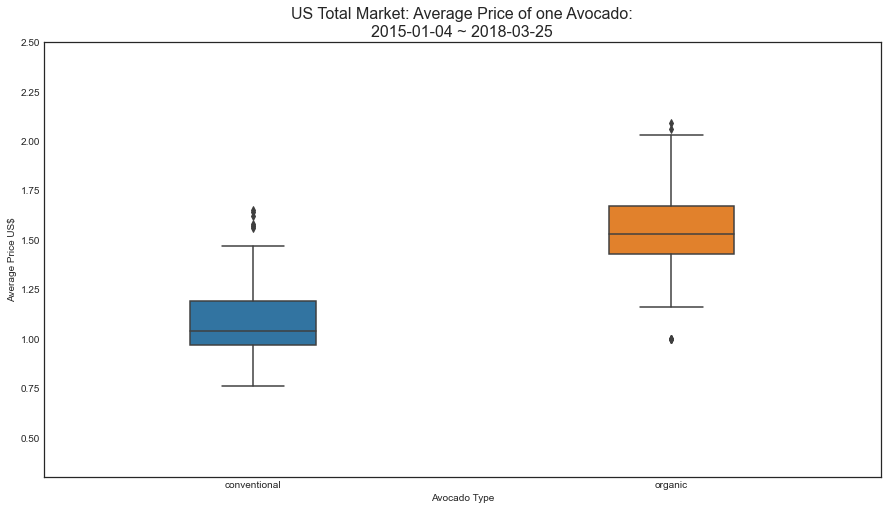

In [30]:
plt.figure(figsize=(15,8)) 
plt.style.use('seaborn-white')
sns.boxplot(x="type", 
            y="AveragePrice", 
            data=df_US,
            width=0.3)
plt.ylim(0.3,2.5)
plt.title("US Total Market: Average Price of one Avocado:\n" +date_range,  fontsize=16)
plt.xlabel("Avocado Type")
plt.ylabel('Average Price US$')
plt.show()

In [31]:
# split data by type
org=df_US[df_US['type']=='organic']
con=df_US[df_US['type']=='conventional']

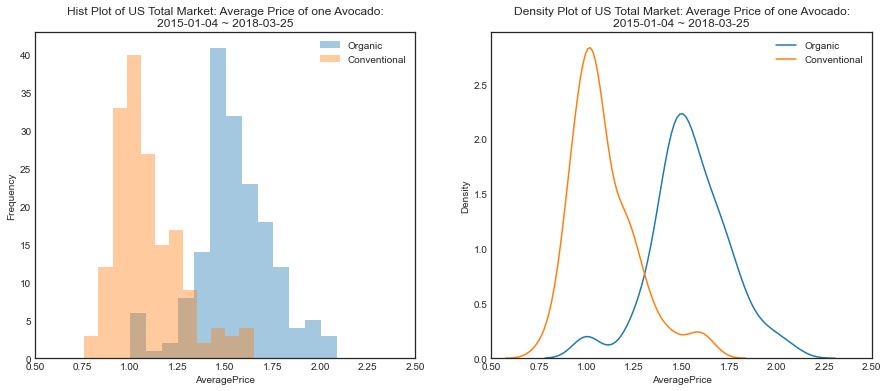

In [32]:

fig, axarr = plt.subplots(1, 2, figsize=(15, 6))
axarr[0].title.set_text('Hist Plot of US Total Market: Average Price of one Avocado:\n' +date_range)

# hist plot
sns.distplot(org['AveragePrice'],  
             kde = False, 
             label='Organic',
             ax=axarr[0])
sns.distplot(con['AveragePrice'],  
             kde = False, 
             label='Conventional', 
             ax=axarr[0])
axarr[0].legend()
axarr[0].set_ylabel('Frequency')
axarr[0].set_xlim([0.5, 2.5])

# density plot
axarr[1].title.set_text('Density Plot of US Total Market: Average Price of one Avocado:\n' +date_range)

sns.distplot(org['AveragePrice'], 
             hist=False, 
             kde = True, 
             label='Organic',
             ax=axarr[1])
sns.distplot(con['AveragePrice'],  
             hist=False, 
             kde = True, 
             label='Conventional', 
             ax=axarr[1])
axarr[1].legend()
axarr[1].set_ylabel('Density')
axarr[1].set_xlim([0.5, 2.5])
plt.show()

### From 2015 to 2017, avocado average price appears to be gradually increasing.

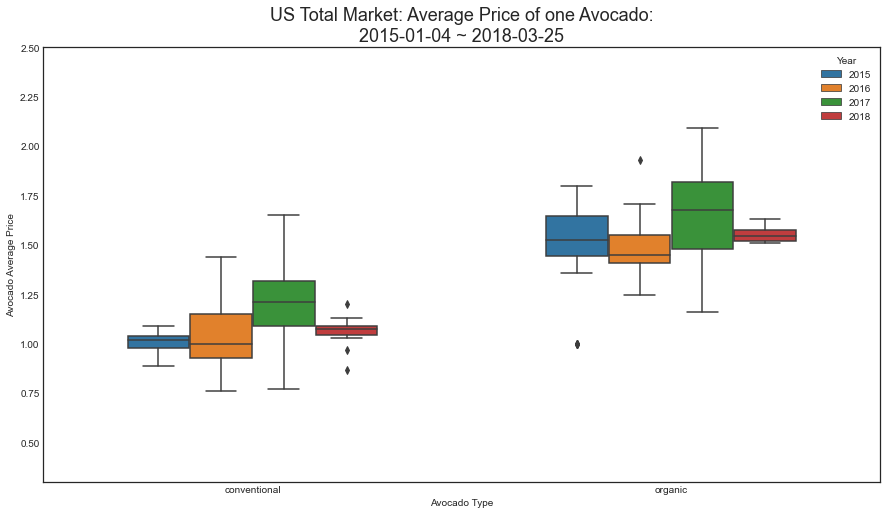

In [33]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df_US, 
            x="type", 
            y="AveragePrice",  width=0.6,
            hue="Year")
plt.ylim(0.3,2.5)
plt.title("US Total Market: Average Price of one Avocado:\n" +date_range,  fontsize=18)
plt.xlabel('Avocado Type')
plt.ylabel('Avocado Average Price')
plt.show()

### We can see there are clear seasonal trends in avocado average price. Sep and Oct, avocado average price for both types tend to be highest.

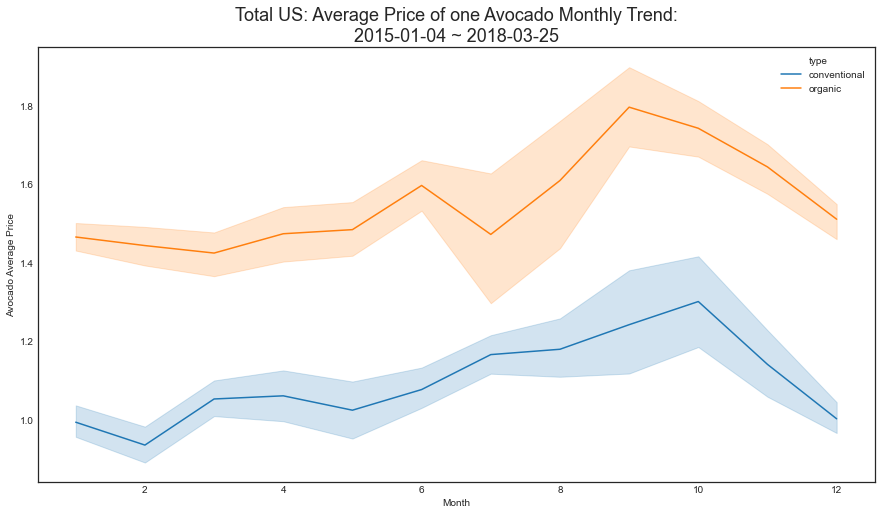

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df_US)
plt.title("Total US: Average Price of one Avocado Monthly Trend:\n" +date_range,  fontsize=18)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

### There are some exceptions to this. In March of 2017, there was a period of time where the conventional and organic avocado prices were similar. Moreover, in July of 2015, organic avocado prices were cheaper than conventional ones.
### This also shows there was a huge seasonal hike in prices after Augest of 2017 and before Jan 2018. 

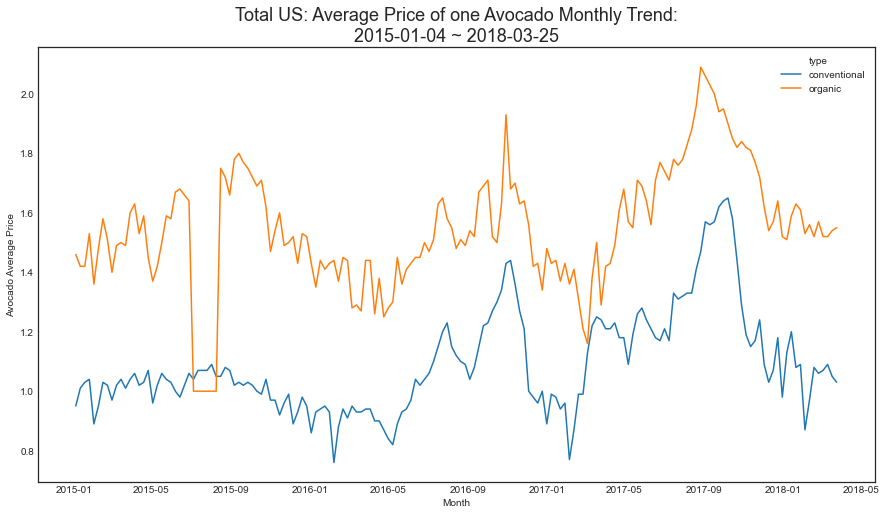

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df_US)
plt.title("Total US: Average Price of one Avocado Monthly Trend:\n" +date_range,  fontsize=18)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

### How product volume affect the average price?

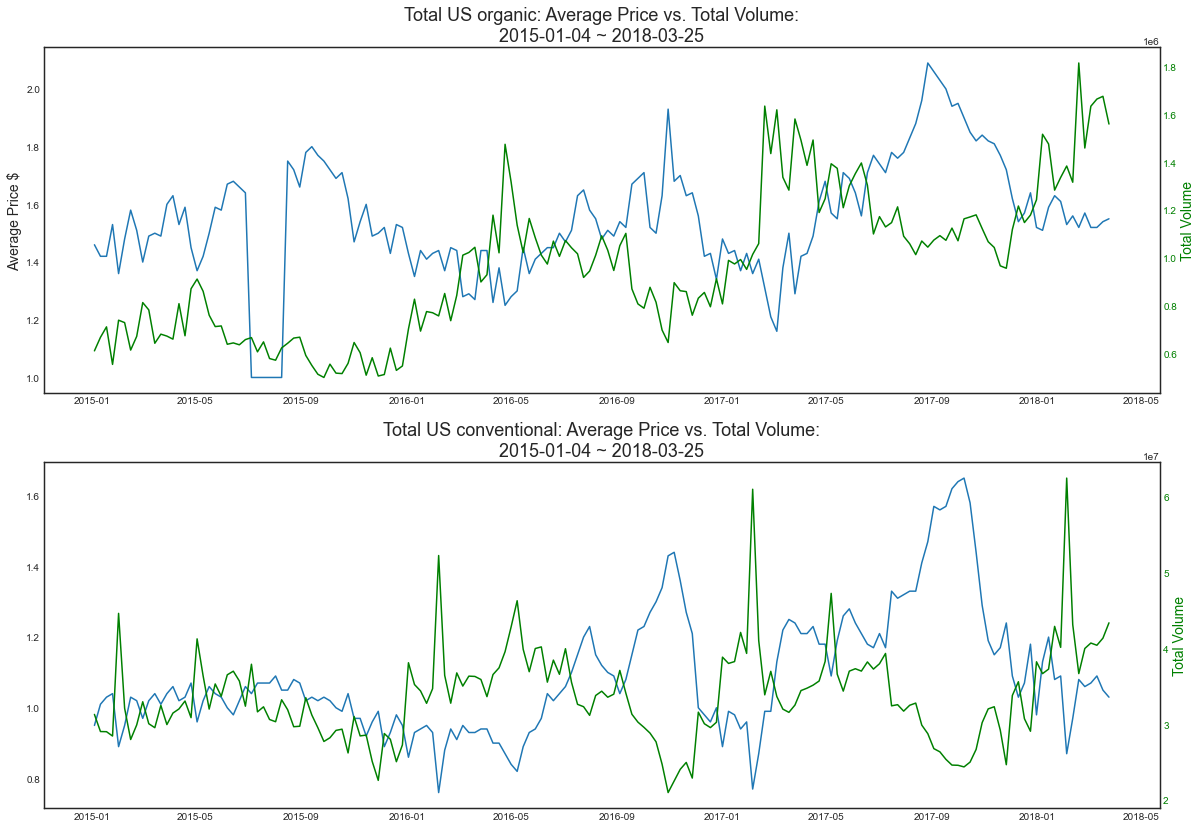

In [36]:
fig = plt.figure(figsize=(20,14)) 
ax1 = fig.add_subplot(211)
ax1.plot(org['Date'], org['AveragePrice'])
ax1.set_ylabel('Average Price $',  fontsize=14)

ax2 = ax1.twinx()
ax2.plot(org['Date'], org['Total Volume'], 'g-', label='Organic')
ax2.set_ylabel('Total Volume', color='g',  fontsize=14)
for tl in ax2.get_yticklabels(): tl.set_color('g')
plt.title("Total US organic: Average Price vs. Total Volume:\n" +date_range,  fontsize=18)
   


ax1 = fig.add_subplot(212)
ax1.plot(con['Date'], con['AveragePrice'], label ="Average Price")

ax2 = ax1.twinx()
ax2.plot(con['Date'], con['Total Volume'], 'g-')
ax2.set_ylabel('Total Volume', color='g',  fontsize=14)
for tl in ax2.get_yticklabels():tl.set_color('g')
plt.title("Total US conventional: Average Price vs. Total Volume:\n" +date_range,  fontsize=18)

plt.show()


### Conventional avocado's average price has negative corrleation with its total volumes-- Lower volumes , Higher price.  However, organic type is not the case: no correation.

In [37]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr_Organic, _ = pearsonr(org['AveragePrice'], org['Total Volume'])
print('Organic correlation: %.3f' % corr_Organic)
corr_Con, _ = pearsonr(con['AveragePrice'], con['Total Volume'])
print('Con correlation: %.3f' % corr_Con)

Organic correlation: 0.024
Con correlation: -0.510


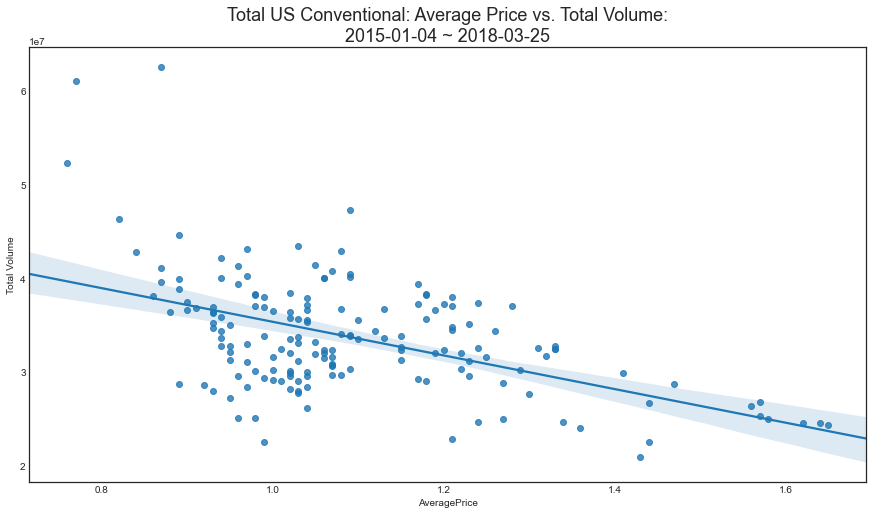

In [38]:
plt.figure(figsize=(15,8))
sns.regplot(x="AveragePrice", y="Total Volume", data=con)
plt.title("Total US Conventional: Average Price vs. Total Volume:\n" +date_range,  fontsize=18)
plt.show()

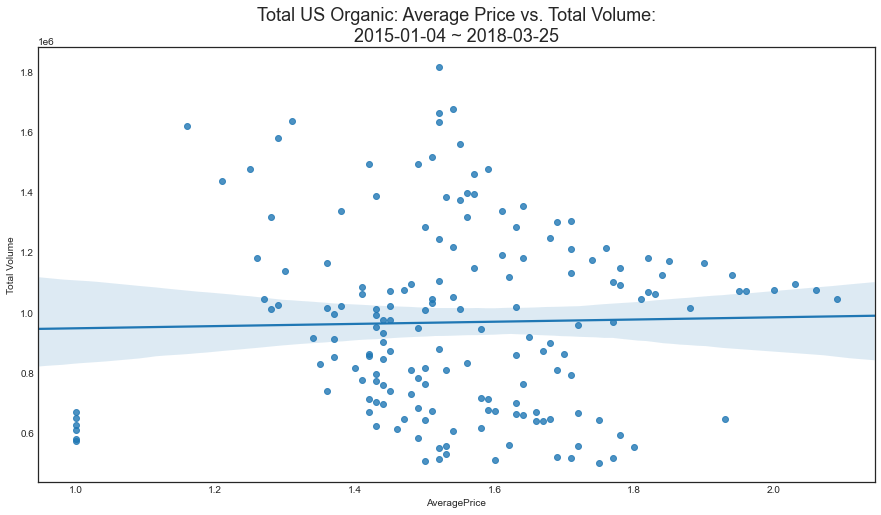

In [39]:
plt.figure(figsize=(15,8))
sns.regplot(x="AveragePrice", y="Total Volume", data=org)
plt.title("Total US Organic: Average Price vs. Total Volume:\n" +date_range,  fontsize=18)

plt.show()